# Explore here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.cluster import KMeans
import utils as eda
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [117]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url , sep=",")

print(df)
 

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [118]:
# Seleccionar solo las columnas deseadas
total_data = df[['Latitude', 'Longitude', 'MedInc']]

print(total_data.head())

   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


In [119]:
eda.analizar(total_data)

Variables numéricas: ['Latitude', 'Longitude', 'MedInc']
Variables no numéricas: []

Shape del dataset: (20640, 3)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None

Valores nulos por columna:
Latitude     0
Longitude    0
MedInc       0
dtype: int64

Filas duplicadas:
       Latitude  Longitude   MedInc
4569      34.07    -118.27   2.3438
4571      34.07    -118.27   2.3438
4605      34.07    -118.33  15.0001
4606      34.07    -118.33  15.0001
5291      34.08    -118.42  15.0001
8852      34.08    -118.42  15.0001
8853      34.07    -118.41  15.0001
8854      34.07    -118.41  15.0001
16328     38.02    -121.33   4.3008
16331     38.02    -121.33   4.3008


In [120]:
total_data = df[['Latitude', 'Longitude', 'MedInc']].copy() # guard una copia para eliminar el warning

print(f"Filas originales: {len(total_data)}")
# Elimino filas duplicadas

total_data.drop_duplicates(inplace=True)

print(f"Filas despues de limpiar: {len(total_data)}")



Filas originales: 20640
Filas despues de limpiar: 20635


cluster
3    6478
1    4886
0    4261
2    2763
4    1678
5     569
Name: count, dtype: int64


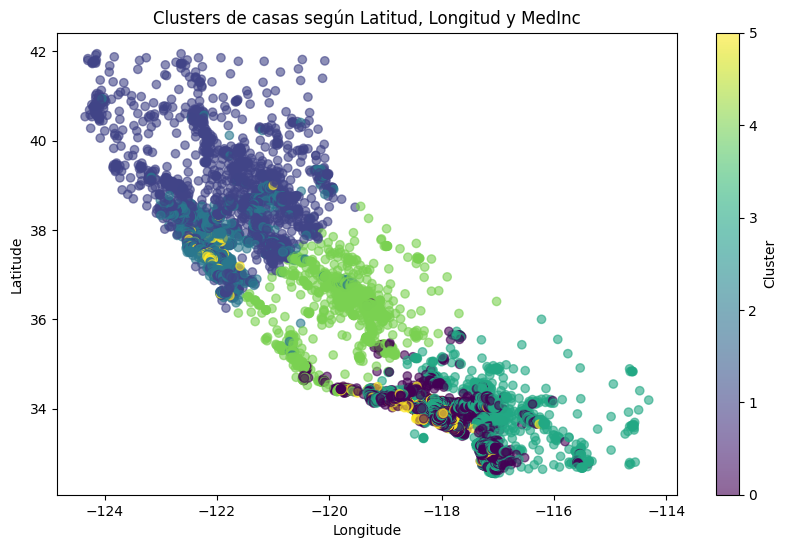

In [121]:
# Creo modelo K-Means con 6 cluster
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(total_data) # entreno el modelo 

# Añadir columna cluster al dataframe
total_data['cluster'] = kmeans.labels_

print(total_data['cluster'].value_counts()) # Reviso el formato y valores de la columna cluster

plt.figure(figsize=(10, 6))
scatter = plt.scatter(total_data['Longitude'], total_data['Latitude'], c=total_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas según Latitud, Longitud y MedInc')
plt.show()

In [122]:
# Divido en train / test 
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=42)

In [123]:
# Dividir en train y test (por ejemplo 80% train, 20% test)
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=42)

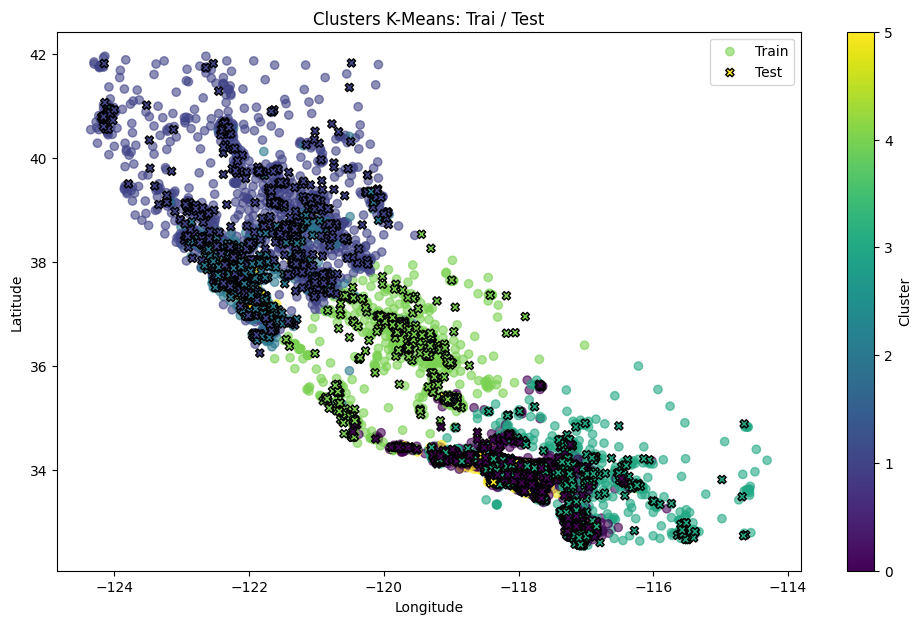

In [ ]:
# Predecir clusters para el conjunto de test
test_data['cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

plt.figure(figsize=(12, 7))

# Puntos Train
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', marker='o', label='Train', alpha=0.6)

# Puntos test
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='viridis', marker='X', label='Test', edgecolor='k')

plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters K-Means: Trai / Test')
plt.legend()
plt.show()

Accuracy: 0.9922
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       878
           1       0.99      0.99      0.99       959
           2       0.99      0.99      0.99       530
           3       0.99      0.99      0.99      1321
           4       0.99      0.99      0.99       337
           5       0.99      0.99      0.99       102

    accuracy                           0.99      4127
   macro avg       0.99      0.99      0.99      4127
weighted avg       0.99      0.99      0.99      4127



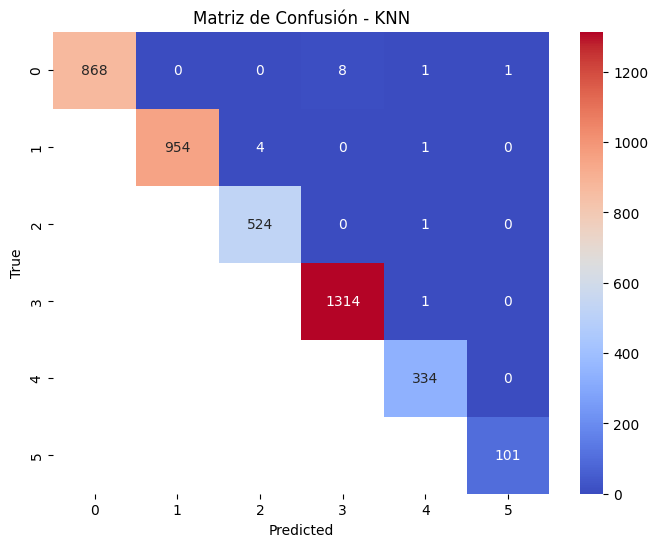

In [132]:
#KNN
# Definir variables de entrada y etiquetas
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']

X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

# Crear y entrenar el modelo KNN (puedes ajustar n_neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred = knn.predict(X_test)

# Métricas de evaluación
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

mask = np.tril(np.ones_like(cm, dtype=bool), k=-1)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', mask=mask)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - KNN')
plt.show()

Analisis de resultados: xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


1. Accuracy (Precisión global):
Indica el porcentaje de predicciones correctas sobre el total de muestras. Un valor cercano a 1 (o 100%) indica buen desempeño general, pero no siempre refleja bien el comportamiento en cada clase.
Reporte de clasificación:
Precision: De todas las muestras que el modelo predijo como una clase específica, cuántas realmente pertenecían a esa clase.
2. Recall (Sensibilidad): De todas las muestras que realmente pertenecen a una clase, cuántas fueron correctamente identificadas por el modelo.
3. F1-score: Es la media armónica entre precision y recall, útil para balancear ambos.
Support: Número de muestras reales en cada clase.
Observa si alguna clase tiene valores bajos en precision o recall, lo que indicaría que el modelo tiene dificultades para identificar correctamente esa clase o que confunde otras con ella.
4. Matriz de confusión:
Es una tabla que muestra el número de predicciones correctas e incorrectas por clase.
La diagonal principal representa las predicciones correctas (verdaderos positivos).
Las celdas fuera de la diagonal muestran errores de clasificación (falsos positivos y falsos negativos).
Si ves que algunas clases se confunden mucho (valores altos fuera de la diagonal), puede ser porque son similares o porque el modelo no las distingue bien.
5. Análisis específico para clusters:
Si algunos clusters tienen baja precisión o recall, puede ser que estén muy cercanos en las características (Latitud, Longitud, MedInc) y el modelo los confunda.
Clusters con buen desempeño indican que el modelo puede distinguir bien esas agrupaciones.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Accuracy (0.9922):
El modelo KNN acertó aproximadamente el 99.22% de las predicciones en el conjunto de test. Esto indica un desempeño global muy alto.
Reporte de clasificación:
Todas las clases (clusters 0 a 5) tienen precision, recall y f1-score alrededor de 0.99, lo que significa que el modelo identifica muy bien cada cluster.
El soporte (support) muestra que tienes un buen número de muestras en cada cluster, desde 102 hasta 1321, y el modelo funciona bien incluso en clusters con menos muestras (como el cluster 5 con 102 muestras).
La consistencia entre precision y recall indica que el modelo no solo predice bien las clases, sino que también no está sesgado hacia ninguna clase en particular.
Implicaciones:
El modelo KNN está capturando muy bien la estructura que K-Means definió en los datos.
Esto valida que la segmentación no supervisada (K-Means) generó clusters bien diferenciados y que un modelo supervisado puede aprender a predecirlos con alta precisión.
Puedes confiar en este modelo para clasificar nuevas casas en uno de estos 6 clusters basados en latitud, longitud e ingreso medio.
Siguiente paso:
Puedes usar este modelo supervisado para etiquetar nuevos datos rápidamente sin tener que recalcular K-Means.
También podrías explorar ajustar parámetros de KNN (como el número de vecinos) para ver si mejoras aún más o pruebas otros modelos para comparar.

heatmap 

Diagonal principal (predicciones correctas):
Los valores en la diagonal son muy altos para todos los clusters (por ejemplo, 868 para el cluster 0, 954 para el 1, 524 para el 2, 1314 para el 3, 334 para el 4 y 101 para el 5). Esto confirma que la mayoría de las muestras fueron clasificadas correctamente.
Errores de clasificación (valores fuera de la diagonal):
Hay muy pocos errores, pero algunos se pueden observar:
Cluster 0: 8 muestras fueron clasificadas como cluster 3, 1 como cluster 4 y 1 como cluster 5.
Cluster 1: 4 muestras clasificadas como cluster 2, 1 como cluster 4.
Cluster 2: 1 muestra clasificada como cluster 4.
Cluster 3: 1 muestra clasificada como cluster 2.
Cluster 4 y 5 tienen prácticamente cero errores.
Interpretación:
La mayoría de los clusters están muy bien diferenciados.
Los errores son mínimos y dispersos, lo que indica que el modelo KNN distingue muy bien entre los clusters.
Los pocos errores que hay podrían deberse a casas que están en zonas limítrofes o con características muy similares entre clusters vecinos.
Conclusión:
El modelo KNN es muy efectivo para clasificar las casas en los clusters definidos por K-Means.
La matriz de confusión respalda el alto accuracy y las métricas de clasificación que viste antes.